<a href="https://colab.research.google.com/github/VanessaKasei/demo-repo/blob/main/Kasei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
#Seaborn is a library for making statistical graphics in Python
#pandas is an open-source library that provides high-performance data manipulation in Python.
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
# load and save filepath to variable for easier access
exam_file_path='/content/drive/MyDrive/exams.csv'

In [ ]:
# read the data and store data in DataFrame titled exam_data
exam_data=pd.read_csv(exam_file_path)

In [ ]:
#show all columns in the data set
exam_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
#filter all rows with missing values
filtered_exam_data= exam_data.dropna(axis=0)

In [ ]:
#selecting prediction target(gender)
y=exam_data.gender

In [ ]:
#assigning 1 and 2 to the string varibles "male" and "female"
exam_data.gender[exam_data.gender == 'male'] = 1
exam_data.gender[exam_data.gender == 'female'] = 2
print(exam_data)

    gender race/ethnicity parental level of education         lunch  \
0        1        group A                 high school      standard   
1        2        group D            some high school  free/reduced   
2        1        group E                some college  free/reduced   
3        1        group B                 high school      standard   
4        1        group E          associate's degree      standard   
..     ...            ...                         ...           ...   
995      1        group C                 high school      standard   
996      1        group D          associate's degree  free/reduced   
997      2        group C            some high school  free/reduced   
998      2        group C                some college      standard   
999      1        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67             63  
1  

<ipython-input-8-451b1a056f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_data.gender[exam_data.gender == 'male'] = 1
<ipython-input-8-451b1a056f8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_data.gender[exam_data.gender == 'female'] = 2


In [ ]:
#columns to be used in making predictions
exam_features=[ 'reading score','math score',
       'writing score']       

In [ ]:
X=filtered_exam_data[exam_features]


In [ ]:
#printing the top 5 rows of the data set
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group A,high school,standard,completed,67,67,63
1,2,group D,some high school,free/reduced,none,40,59,55
2,1,group E,some college,free/reduced,none,59,60,50
3,1,group B,high school,standard,none,77,78,68
4,1,group E,associate's degree,standard,completed,78,73,68


In [ ]:
#printing the last 5 rows of the data set
exam_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,1,group C,high school,standard,none,73,70,65
996,1,group D,associate's degree,free/reduced,completed,85,91,92
997,2,group C,some high school,free/reduced,none,32,35,41
998,2,group C,some college,standard,none,73,74,82
999,1,group A,some college,standard,completed,65,60,62


In [ ]:
#scikit learn is a python library used for creating models
#a model tries to draw some conclusion from the input values given for training
#decision tree regressor observes features of an object and trains a model in the structure of a tree to 
#cont......predict data in the future to produce meaningful continuous output
from sklearn.tree import DecisionTreeRegressor

# Define model.
# Specify a number for random_state to ensure same results each run
#random state is used in order to get consistent results
exam_model = DecisionTreeRegressor(random_state=1)

# Fit model
#Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained.
exam_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
#testing how the prediction function works with the first few rows of the training data
print("Making predictions for the top 5 students:")
print(X.head())
print("The predictions are")
print(exam_model.predict(X.head()))

Making predictions for the top 5 students:
   reading score  math score  writing score
0             67          67             63
1             59          40             55
2             60          59             50
3             78          77             68
4             73          78             68
The predictions are
[1. 2. 1. 1. 1.]


In [ ]:
#The scikit-learn library has a function train_test_split to break up the data into two pieces
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
exam_model = DecisionTreeRegressor()
# Fit model
exam_model.fit(train_X, train_y)

# get predicted gender  on validation data
val_predictions = exam_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

NameError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_exam_gender = exam_model.predict(X)
mean_absolute_error(y, predicted_exam_gender)

0.054400000000000004

In [ ]:
#Overfitting is where a model captures spurious patterns that won't recur in the future, leading to less accurate predictions
#Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
exam_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, exam_preds))

0.20653200000000002


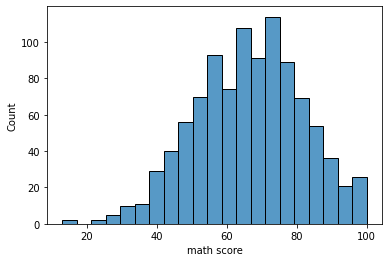

In [ ]:
# Histograms show the distribution of a single numerical variable. 
#shows math scores among the students
sns.histplot(exam_data['math score'])

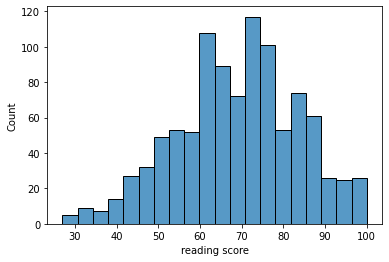

In [ ]:
 #shows reading scores among the students
sns.histplot(exam_data['reading score'])

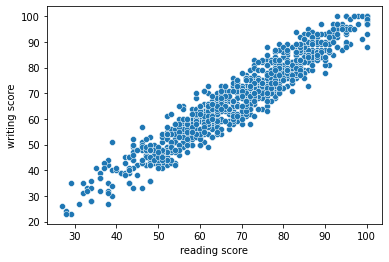

In [ ]:
#Scatter plots show the relationship between two continuous variables
sns.scatterplot(x=exam_data['reading score'], y=exam_data['writing score'])

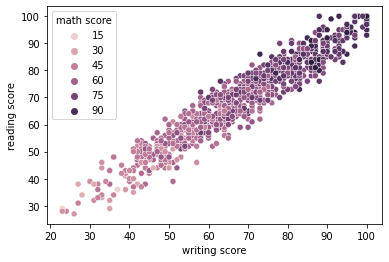

In [ ]:
#We can use scatter plots to display the relationships between three variables
sns.scatterplot(x=exam_data['writing score'], y=exam_data['reading score'], hue=exam_data['math score'])

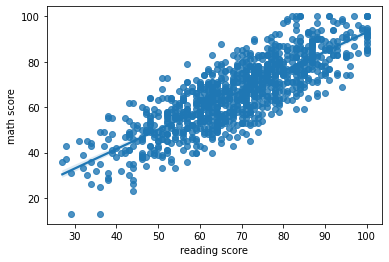

In [ ]:
#regression line in the scatter plot makes it easier to see any linear relationship between two variables.
# if a student scores high in reading he/she will definitely score high in math
sns.regplot(x=exam_data['reading score'], y=exam_data['math score'])